# Regression model selection

## Data preprocessing

### Importng libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the data

In [29]:
data = pd.read_csv("Data.csv")
# Split data into input and out put
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [30]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### Spliting data into training and test set

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
x_train.shape

(7654, 4)

## Model training

### Feature scaling

In [33]:
# Prepare data for SVR model
from sklearn.preprocessing import StandardScaler

y_stan_scal = StandardScaler()
x_stan_scal = StandardScaler()

y_scaled = y_stan_scal.fit_transform(y_train.reshape(-1, 1))
x_scaled = x_stan_scal.fit_transform(x_train)
x_test_scaled = x_stan_scal.transform(x_test)

In [34]:
# prepar data for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=4)
x_train_poly = poly_feature.fit_transform(x_train)
x_test_poly = poly_feature.transform(x_test)

## Model training

In [35]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_poly_model = LinearRegression()

linear_model.fit(x_train, y_train)
linear_poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [36]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Build the models
svr_model = SVR()
tree_model = DecisionTreeRegressor(random_state = 0)
forest_model = RandomForestRegressor(random_state = 0)

# Train the models
svr_model.fit(x_scaled, y_scaled.reshape(-1, ))
tree_model.fit(x_train, y_train)
forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

## Predicting test data with models

In [37]:
y_pred_lin = linear_model.predict(x_test)
y_pred_pol = linear_poly_model.predict(x_test_poly)
y_pred_svr = svr_model.predict(x_test_scaled)
y_pred_tree = tree_model.predict(x_test)
y_pred_forest = forest_model.predict(x_test)

## Model accuracy

In [38]:
from sklearn.metrics import r2_score
lin_acc = r2_score(y_test, y_pred_lin)
pol_acc = r2_score(y_test, y_pred_pol)
svr_acc = r2_score(y_test, y_stan_scal.inverse_transform(y_pred_svr.reshape(-1, 1)).reshape(-1, ))
tree_acc = r2_score(y_test, y_pred_tree)
forest_acc = r2_score(y_test, y_pred_forest)

### Displaying the results

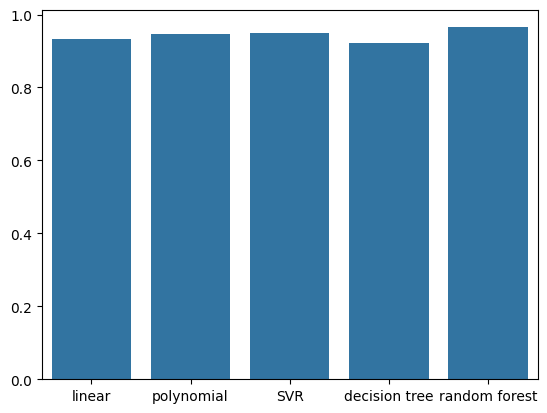

In [39]:
import seaborn as sns
ax = sns.barplot(x=np.array(['linear', 'polynomial', 'SVR', 'decision tree', 'random forest']), y=np.array([lin_acc, pol_acc, svr_acc, tree_acc, forest_acc]))

In [40]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=['linear', 'polynomial', 'SVR', 'decision tree', 'random forest'], y=[lin_acc, pol_acc, svr_acc, tree_acc, forest_acc], text=[lin_acc, pol_acc, svr_acc, tree_acc, forest_acc]))
fig.update_traces(textposition="inside")
fig.show()